## Setup

In [1]:
import matplotlib.pyplot as plt
from skimage.filters import *
import imutils
import cv2
import numpy as np

## Import image

In [27]:
src = cv2.imread("./images/1.png")

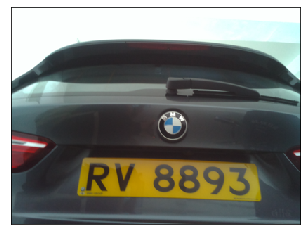

In [28]:
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
_ = plt.xticks([]), plt.yticks([])

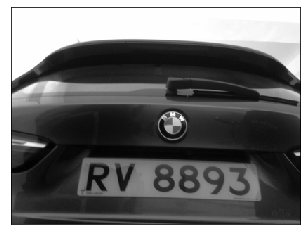

In [29]:
bw = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
plt.imshow(bw, cmap = 'gray', )
_ = plt.xticks([]), plt.yticks([])

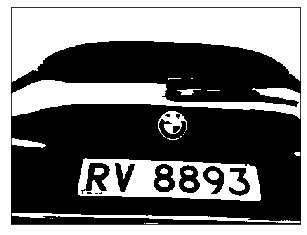

In [30]:
threshold_value = threshold_minimum(bw)
binary_image = bw > threshold_value
binary_image = binary_image.astype(np.uint8)
plt.imshow(binary_image, cmap = 'gray', )
_ = plt.xticks([]), plt.yticks([])

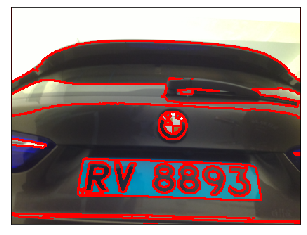

In [31]:
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
src_lines = src.copy()
cv2.drawContours(src_lines, contours, -1, (255,0,0), 2)
plt.imshow(src_lines)
_ = plt.xticks([]), plt.yticks([])

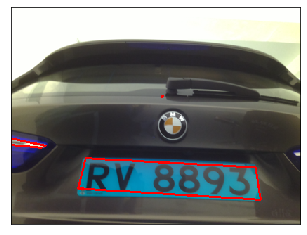

In [32]:
boxes = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, cv2.arcLength(contour, True) * 0.02, True)
    if len(approx) == 4 and cv2.isContourConvex(approx):
        boxes.append(approx)

src_bounding_boxes = src.copy()

for box in boxes:
    cv2.drawContours(src_bounding_boxes, [box], -1, (255,0,0), 2)

plt.imshow(src_bounding_boxes)
_ = plt.xticks([]), plt.yticks([])